Alejandro Jesús González Santana

## Fith benchmark matrix multiplication: map reduce

   Size      Mean     Ops
0     2  0.734992  1.3606
1     4  1.165155  0.8583
2     8  1.430585  0.6990
3    16  1.675104  0.5970
4    32  2.558977  0.3908
5    64  7.036151  0.1421
   Size       Mean         Ops
0     2   0.055620  17979.1442
1     4   0.071760  13935.3400
2     8   0.184040   5433.6014
3    16   0.836970   1196.0721
4    32   6.123375    163.3086
5    64  54.280760     18.4227


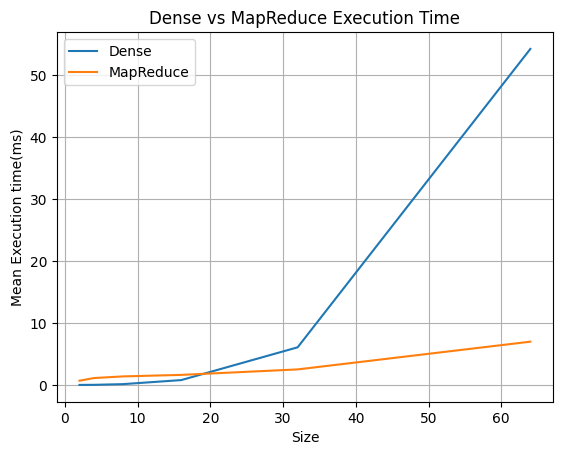

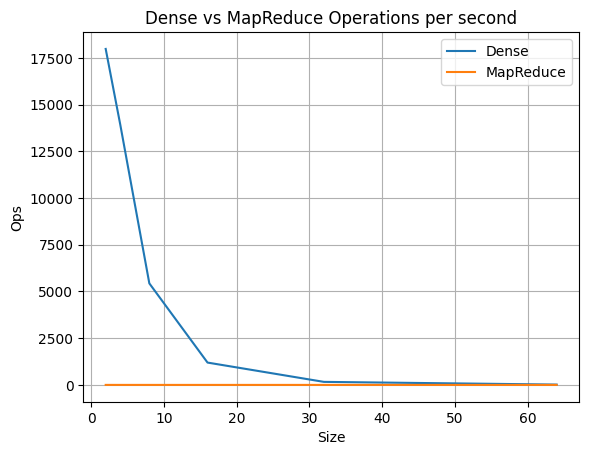

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datosDense.csv', delimiter=';')
df_map_reduce = pd.read_csv('datosMapReduce.csv', delimiter=';')


df['Mean'] = df['Mean'] / 1000
df_map_reduce['Execution Time'] = df_map_reduce['Execution Time'] / 1000

df_map_reduce = df_map_reduce.rename(columns={'Execution Time': 'Mean'})

print(df_map_reduce)
print(df)

ax = df.plot.line(x='Size', y='Mean', label='Dense')
df_map_reduce.plot.line(x='Size', y='Mean', ax=ax, label='MapReduce')
ax.set_xlabel('Size')
ax.set_ylabel('Mean Execution time(ms)')
ax.grid()
ax.legend()
ax.set_title('Dense vs MapReduce Execution Time')
plt.show()


ax = df.plot.line(x='Size', y='Ops', label='Dense')
df_map_reduce.plot.line(x='Size', y='Ops', ax=ax, label='MapReduce')
ax.set_xlabel('Size')
ax.set_ylabel('Ops')
ax.grid()
ax.legend()
ax.set_title('Dense vs MapReduce Operations per second')
plt.show()




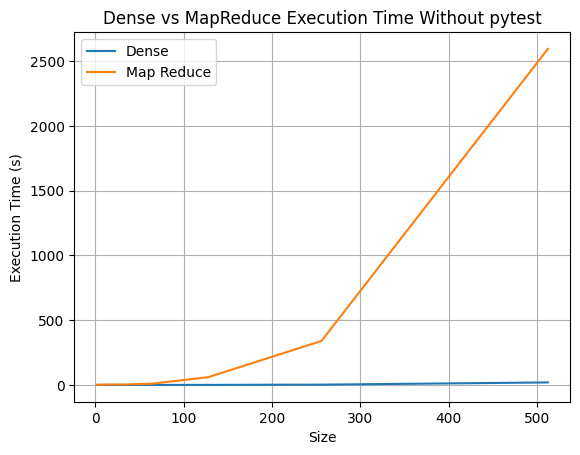

In [22]:
import pandas as pd
df = pd.read_csv('datosCombined.csv', delimiter=';')

if 'Type' not in df.columns:
    df['Type'] = ''

df = df.rename(columns={'Execution Time MapReduce Seconds': 'Map Reduce'})
df = df.rename(columns={'Execution Time Dense Seconds': 'Dense'})

ax = df.plot.line(x='Size', y='Dense', label='Dense')
df.plot.line(x='Size', y='Map Reduce', ax=ax, label='Map Reduce')
ax.set_xlabel('Size')
ax.set_ylabel('Execution Time (s)')

ax.grid()
ax.legend()
ax.set_title('Dense vs MapReduce Execution Time Without pytest')
plt.show()

In [27]:
df['Dense Mean'] = df['Dense'].mean()
df['Map Reduce Mean'] = df['Map Reduce'].mean()

df['Dense / Map Reduce'] = df['Map Reduce Mean']  / df['Dense Mean']
df['Dense / Map Reduce without mean'] = df['Map Reduce']  / df['Dense']
print(df)

   Size   Map Reduce      Dense Type  Dense Mean  Map Reduce Mean  \
0     2     1.053291   0.000000          2.40969       334.858474   
1     4     1.430036   0.000000          2.40969       334.858474   
2     8     2.034016   0.000992          2.40969       334.858474   
3    16     3.148957   0.000000          2.40969       334.858474   
4    32     3.126181   0.005003          2.40969       334.858474   
5    64     9.152675   0.059976          2.40969       334.858474   
6   128    60.198879   0.275473          2.40969       334.858474   
7   256   339.449894   2.165606          2.40969       334.858474   
8   512  2594.132339  19.180158          2.40969       334.858474   

   Dense / Map Reduce  Dense / Map Reduce without mean  
0           138.96331                              inf  
1           138.96331                              inf  
2           138.96331                      2049.803480  
3           138.96331                              inf  
4           138.96331   